<a href="https://colab.research.google.com/github/Raoina/Hand-Gesture-Classification/blob/main/project_ml1_hand_gesture_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
df = pd.read_csv('/content/hand_landmarks_data.csv')
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


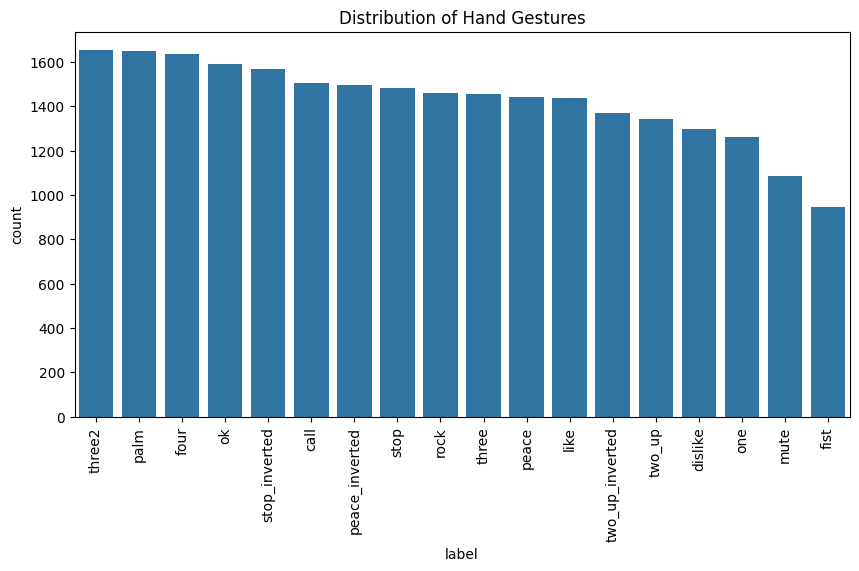

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x=df["label"], order=df["label"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Hand Gestures")
plt.show()

In [ ]:
df.dropna(inplace=True)

In [ ]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [ ]:
def preprocess_landmarks(row):
    wrist_x, wrist_y = row[0], row[1]
    mid_finger_x, mid_finger_y = row[36], row[37]  # Tip of the middle finger (landmark 12)

    processed = []
    for i in range(0, 63, 3):  # x, y, z for 21 landmarks
        x = row[i] - wrist_x
        y = row[i+1] - wrist_y
        x /= mid_finger_x - wrist_x
        y /= mid_finger_y - wrist_y
        z = row[i+2]  # z is already processed
        processed.extend([x, y, z])
    return processed

features = df.drop('label', axis=1)
labels = df['label']
processed_features = features.apply(preprocess_landmarks, axis=1, result_type='expand')

<ipython-input-37-1c96881a32e3>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wrist_x, wrist_y = row[0], row[1]
<ipython-input-37-1c96881a32e3>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mid_finger_x, mid_finger_y = row[36], row[37]  # Tip of the middle finger (landmark 12)
<ipython-input-37-1c96881a32e3>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = row[i] - wrist_x
<ipython-input-37-1c96881a32e3>:8: FutureWarning: 

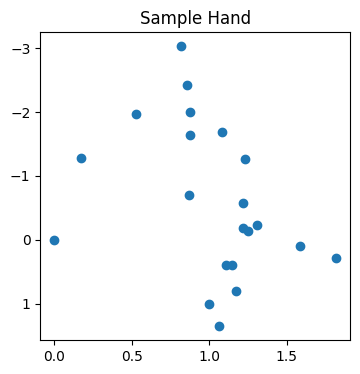

In [ ]:
def plot_hand(points, title="Hand Landmarks"):
    x = points[::3]
    y = points[1::3]
    plt.figure(figsize=(4,4))
    plt.scatter(x, y)
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.show()

plot_hand(processed_features.iloc[0].values, title="Sample Hand")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    processed_features, labels, test_size=0.2, random_state=42, stratify=labels
)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

--- Random Forest ---
                 precision    recall  f1-score   support

           call       0.99      0.98      0.99       301
        dislike       0.98      0.98      0.98       259
           fist       1.00      0.99      0.99       189
           four       0.97      0.96      0.96       327
           like       0.97      0.97      0.97       287
           mute       0.95      0.97      0.96       217
             ok       0.99      0.99      0.99       318
            one       0.95      0.95      0.95       253
           palm       0.92      0.95      0.93       330
          peace       0.95      0.93      0.94       288
 peace_inverted       0.99      0.95      0.97       299
           rock       1.00      0.98      0.99       292
           stop       0.92      0.94      0.93       296
  stop_inverted       0.98      0.99      0.98       314
          three       0.99      0.97      0.98       291
         three2       0.97      0.98      0.98       331
        

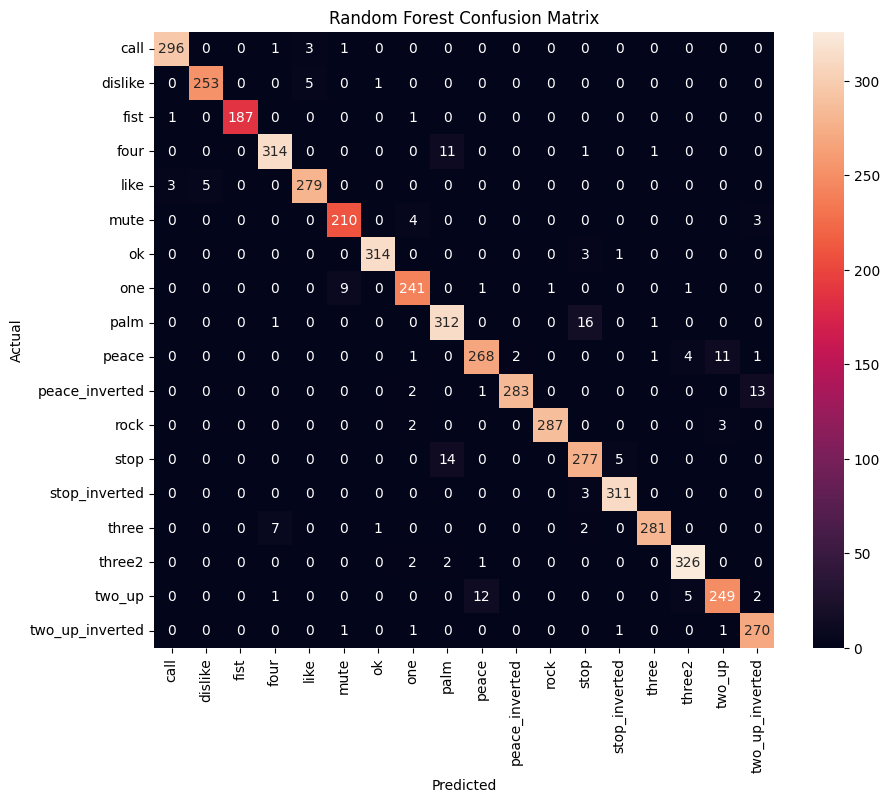

--- SVM ---
                 precision    recall  f1-score   support

           call       0.46      0.02      0.04       301
        dislike       0.00      0.00      0.00       259
           fist       0.00      0.00      0.00       189
           four       0.13      0.05      0.07       327
           like       0.38      0.04      0.07       287
           mute       0.00      0.00      0.00       217
             ok       0.00      0.00      0.00       318
            one       0.00      0.00      0.00       253
           palm       0.31      0.04      0.07       330
          peace       0.75      0.01      0.02       288
 peace_inverted       0.00      0.00      0.00       299
           rock       0.00      0.00      0.00       292
           stop       0.00      0.00      0.00       296
  stop_inverted       0.18      0.02      0.03       314
          three       0.00      0.00      0.00       291
         three2       0.07      0.96      0.12       331
         two_up   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


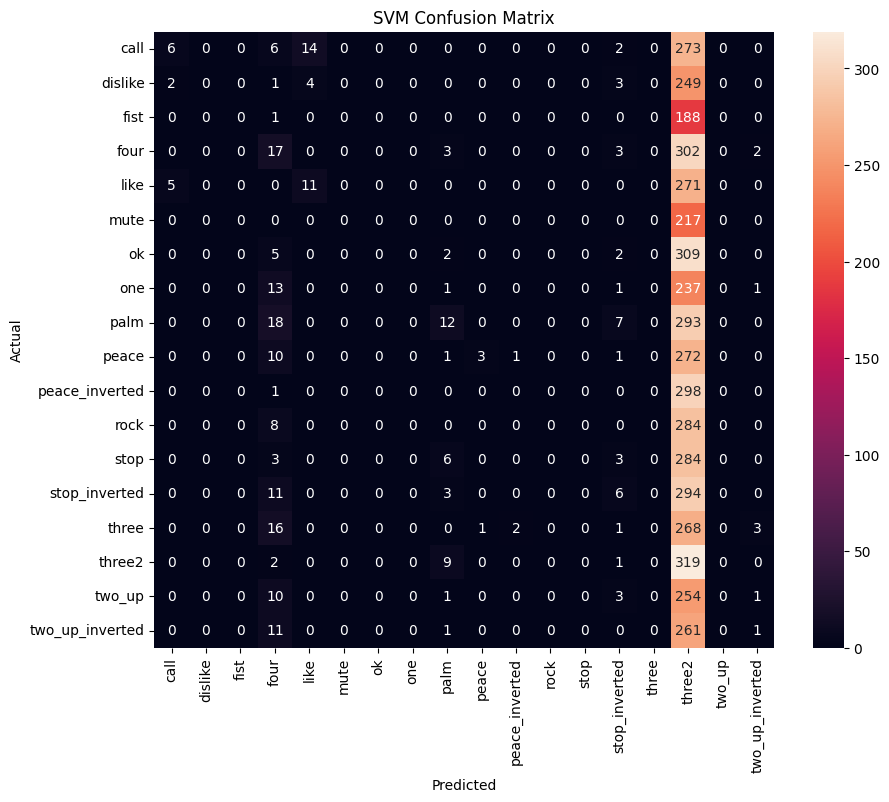

--- KNN ---
                 precision    recall  f1-score   support

           call       0.96      0.95      0.95       301
        dislike       0.92      0.89      0.91       259
           fist       0.99      0.96      0.98       189
           four       0.94      0.98      0.96       327
           like       0.88      0.91      0.90       287
           mute       0.95      0.97      0.96       217
             ok       0.97      0.94      0.96       318
            one       0.93      0.93      0.93       253
           palm       0.90      0.98      0.94       330
          peace       0.92      0.88      0.90       288
 peace_inverted       0.92      0.94      0.93       299
           rock       0.99      0.94      0.97       292
           stop       0.83      0.85      0.84       296
  stop_inverted       0.85      0.85      0.85       314
          three       0.95      0.94      0.95       291
         three2       0.98      0.98      0.98       331
         two_up   

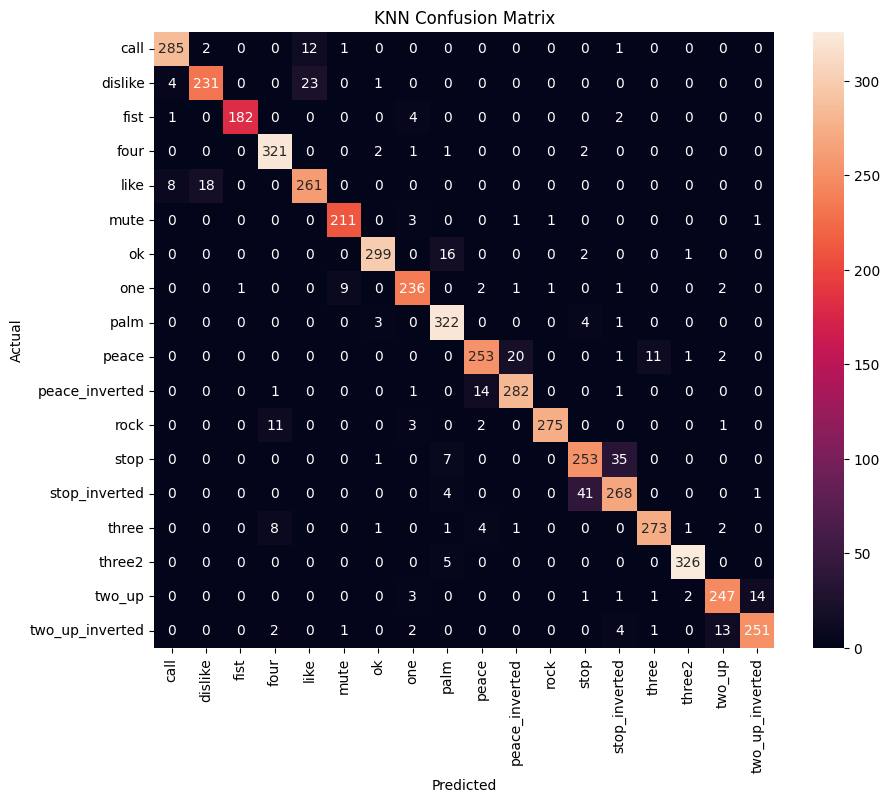

In [ ]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_svm, "SVM")
evaluate_model(y_test, y_pred_knn, "KNN")


# **Conclusion**:

Based on the evaluation results, the RandomForestClassifier achieved the best performance in terms of accuracy and robustness compared to other models tested.
It demonstrated better generalization on the test set and was more stable during training, making it the most suitable choice for hand gesture classification using MediaPipe landmarks.